In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Agro-Genesis/yield_df.csv")

In [ ]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
df.duplicated().sum()

2310

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [ ]:
len(df['Area'].unique())

101

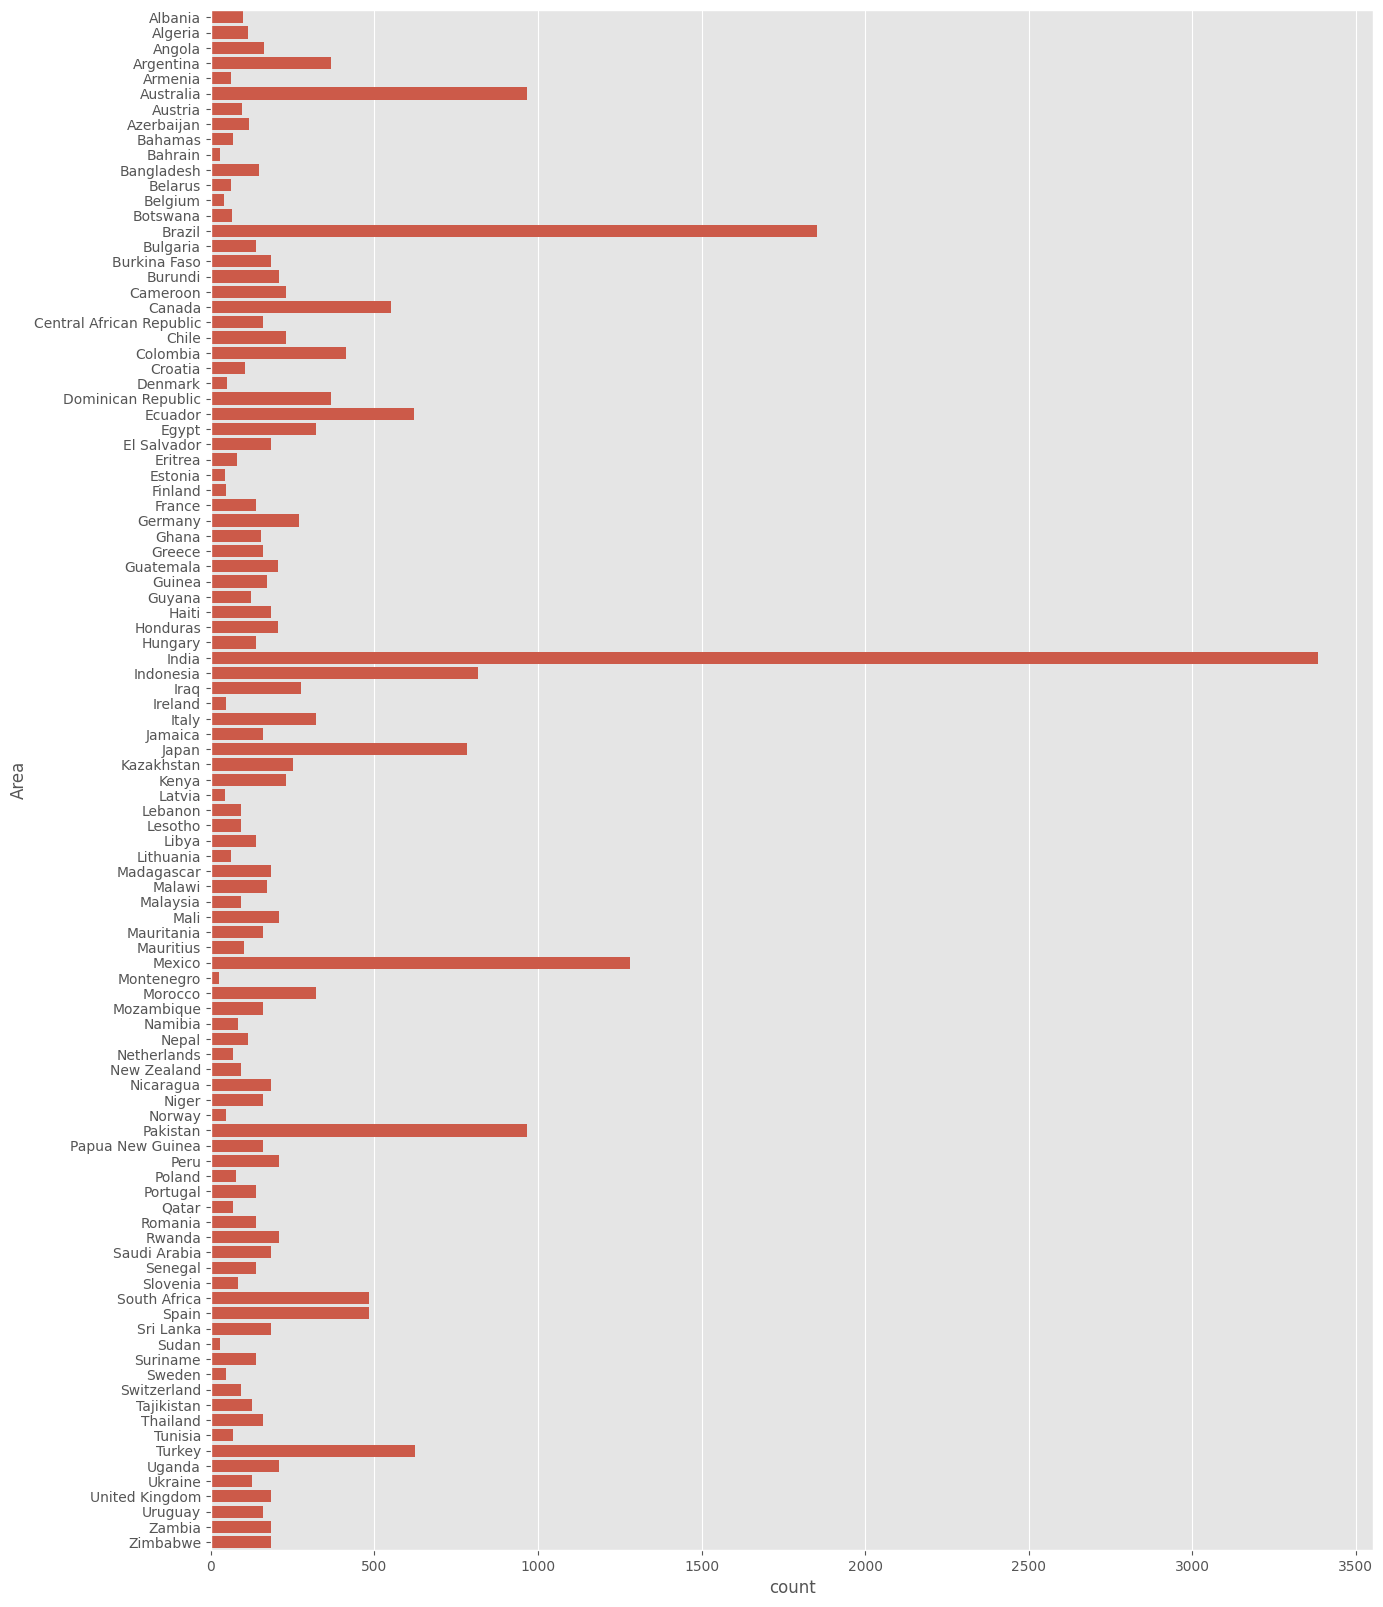

In [ ]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Area'])
plt.show()

In [ ]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [ ]:
yield_per_country


[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

In [ ]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

In [ ]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']

In [ ]:
df = df[col]

In [ ]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [ ]:
X.shape

(25932, 6)

In [ ]:
y.shape

(25932,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4,5])
    ],
    remainder = 'passthrough'
)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler

# ohe = OneHotEncoder(drop='first', handle_unknown='ignore')  # Add handle_unknown='ignore'
# scale = StandardScaler()

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('StandardScale', scale, [0, 1, 2, 3]),   # Numerical columns
#         ('OneHotEncode', ohe, [4, 5])             # Categorical columns: Area, Item
#     ],
#     remainder='passthrough'
# )


In [ ]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy  = preprocesser.fit_transform(X_test)

In [ ]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OneHotEncode__Area_Algeria', 'OneHotEncode__Area_Angola',
       'OneHotEncode__Area_Argentina', 'OneHotEncode__Area_Armenia',
       'OneHotEncode__Area_Australia', 'OneHotEncode__Area_Austria',
       'OneHotEncode__Area_Azerbaijan', 'OneHotEncode__Area_Bahamas',
       'OneHotEncode__Area_Bahrain', 'OneHotEncode__Area_Bangladesh',
       'OneHotEncode__Area_Belarus', 'OneHotEncode__Area_Belgium',
       'OneHotEncode__Area_Botswana', 'OneHotEncode__Area_Brazil',
       'OneHotEncode__Area_Bulgaria', 'OneHotEncode__Area_Burkina Faso',
       'OneHotEncode__Area_Burundi', 'OneHotEncode__Area_Cameroon',
       'OneHotEncode__Area_Canada',
       'OneHotEncode__Area_Central African Republic',
       'OneHotEncode__Area_Chile', 'OneHotEncode__Area_Colombia',
       'OneHotEncode__Area_Croatia', 'OneHotEncode__Area_Denmark',
   

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    print(f"{name}: mae : {mean_absolute_error(y_test, y_pred)} r2 score : {r2_score(y_test, y_pred)}")

Linear Regression: mae : 29897.28805252291 score : 0.7472732661395576


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso: mae : 29883.830652070385 score : 0.7472938374682895
Ridge: mae : 29852.960374434308 score : 0.747262666435168
Decision Tree: mae : 5599.32311548101 score : 0.9670677847489924
KNN: mae : 4679.874725274726 score : 0.9846231501994461


In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 16135., 34879., 79048.])

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create a DataFrame with the correct feature names
    features = pd.DataFrame([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]],
                            columns=['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item'])

    # Transform the features
    transformed_features = preprocessor.transform(features)

    # Predict the yield
    predicted_yield = dtr.predict(transformed_features).reshape(-1, 1)

    return predicted_yield[0][0]

In [ ]:
# preprocessor.fit(X_train)

In [ ]:
result = prediction(1999,1485.0,121.0,16.37,'Albania','Maize')

In [ ]:
result

37455.0

In [ ]:
 #  import pickle
# pickle.dump(dtr, open("dtr.pkl","wb"))
# pickle.dump(preprocesser, open("preprocesser.pkl","wb"))

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

df = pd.read_csv("/content/drive/MyDrive/Agro-Genesis/Crop_yield_prediction_data.csv")

df.drop_duplicates(inplace=True)

df.describe()

plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

country = df['Area'].unique()
yield_per_country = [df[df['Area'] == state]['hg/ha_yield'].sum() for state in country]

crops = df['Item'].unique()
yield_per_crop = [df[df['Item'] == crop]['hg/ha_yield'].sum() for crop in crops]

col = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]

X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define the transformers
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
scale = StandardScaler()

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', scale, ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']),
        ('encoder', ohe, ['Area', 'Item'])
    ],
    remainder='passthrough'
)

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
# Transform the test data
X_test_preprocessed = preprocessor.transform(X_test)

# Display feature names
feature_names = preprocessor.get_feature_names_out()
print("Feature Names:", feature_names)

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    print(f"{name}: MAE: {mean_absolute_error(y_test, y_pred)}, R^2_score: {r2_score(y_test, y_pred)}")
# Train and save the best model
dtr = DecisionTreeRegressor()
dtr.fit(X_train_preprocessed, y_train)

def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create a DataFrame with the correct feature names
    features = pd.DataFrame([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]],
                            columns=['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item'])

    # Transform the features
    transformed_features = preprocessor.transform(features)

    # Predict the yield
    predicted_yield = dtr.predict(transformed_features).reshape(-1, 1)

    return predicted_yield[0][0]


result = prediction(1990, 1485.0, 121.0, 16.37, 'Albania', 'Maize')
print("Prediction Result:", result)

# import pickle
# pickle.dump(dtr, open("dtr.pkl", "wb"))
# pickle.dump(preprocessor, open("preprocessor.pkl", "wb"))


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
import pickle

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Agro-Genesis/yield_df.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop_duplicates(inplace=True)

# Define the columns to keep
col = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]

# Separate features and target
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Define the transformers
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
scale = StandardScaler()

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', scale, ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']),
        ('encoder', ohe, ['Area', 'Item'])
    ],
    remainder='passthrough'
)

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
# Transform the test data
X_test_preprocessed = preprocessor.transform(X_test)

# Train the model
dtr = DecisionTreeRegressor()
dtr.fit(X_train_preprocessed, y_train)

def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create a DataFrame with the correct feature names
    features = pd.DataFrame([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]],
                            columns=['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item'])

    # Transform the features
    transformed_features = preprocessor.transform(features)

    # Predict the yield
    predicted_yield = dtr.predict(transformed_features).reshape(-1, 1)

    return predicted_yield[0][0]

# Predict for a future year (example: 2030)
future_year = 2050
result = prediction(future_year, 1500.0, 100.0, 18.0, 'Albania', 'Maize')
print(f"Prediction Result for {future_year}: {result}")

# Save the model and preprocessor
with open("dtr.pkl", "wb") as model_file:
    pickle.dump(dtr, model_file)
with open("preprocessor.pkl", "wb") as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)


Prediction Result for 2050: 6712.0


In [ ]:

# import pickle
# pickle.dump(dtr, open("dtr.pkl", "wb"))
# pickle.dump(preprocessor, open("preprocessor.pkl", "wb"))